In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/04


# Reactor neutrino spectrum generator

In this notebook I will write my own code, based on the reactorNuSpectrumGenerator code by schedges (Samuel Hedges), to generate reactor neutrino spectra for a given set of reactor properties

## Constants

In [43]:
GeV = 1
MeV = 1e-3*GeV
keV = 1e-6*GeV
eV = 1e-9*GeV
hbarc = 0.19732698 # GeV fm
speed_of_light = 2.997925e8 # m/s
Gf = 1.166378e-5/GeV**2
electron_charge = 1.60217663e-19 # coulombs
amu = 0.931494

METER = 1e15/hbarc
CENTIMETER = 1e-2*METER
SECOND = speed_of_light*METER
YEAR = 60*60*24*365.25*SECOND
JOULE = eV/electron_charge
GW = 1e9*JOULE/SECOND
KILOGRAM = speed_of_light**2*JOULE
KILOGRAMDAY = KILOGRAM*(60*60*24*SECOND)
CM2S = CENTIMETER**2*SECOND

## Importing fluxes for each fissile isotope

### Fluxes from the fluxData folder

### Importing the flux from 2304.14992

In [52]:
fissileIsotopeSpectraFile = root.TFile('./fluxData/BESTIOLE_2023.root')
fissile_isotopes = ["235U", "238U", "239Pu", "241Pu"]
Enu_min, Enu_max, nbins = 0, 12.5, 500
bin_width = (Enu_max - Enu_min)/nbins
nu_energies = np.arange(bin_width/2, 12.5, bin_width)

In [58]:
fissionSpectra = fissileIsotopeSpectraFile.Get("fission")

nu_spectra = {}

for fissile_isotope in fissile_isotopes:
    nu_spectra[fissile_isotope] = [flux for flux in fissionSpectra.Get(f"{fissile_isotope}_nspec")][1:-1]

Text(0,0.5,'Rate (/fission/MeV)')

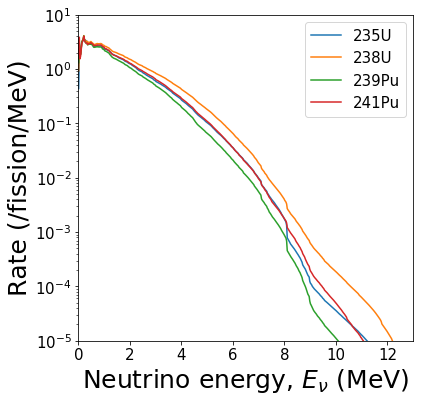

In [63]:
fig, ax = plt.subplots(figsize=(6,6))

for fi in fissile_isotopes:
    ax.plot(nu_energies, nu_spectra[fi], label=fi)

ax.legend(fontsize=15)

ax.set_yscale('log')
ax.set_xlim(0, 13)
ax.set_ylim(1e-5, 1e1)
ax.tick_params(labelsize=15)

ax.set_xlabel(r"Neutrino energy, $E_\nu$ (MeV)", fontsize=25)
ax.set_ylabel("Rate (/fission/MeV)", fontsize=25)